# Step 3: Apply neural networks

In [18]:
from config import models_isot_path
from helpers.metrics_plot import classification_summary

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, LSTM, Bidirectional
import pandas as pd
import joblib


## GRU

In [2]:
news = pd.read_csv("data/isot_news.csv")

max_words = 20000
max_len = 200

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(news['text'])

sequences = tokenizer.texts_to_sequences(news['text'])
X = pad_sequences(sequences, maxlen=max_len)

y = news['label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
joblib.dump(tokenizer, f'{models_isot_path}/tokenizer_isot.joblib')


['models/isot/tokenizer_isot.joblib']

In [3]:
gru = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    GRU(64, return_sequences=False),
    Dense(1, activation='sigmoid')
])

gru.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
gru.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 128)          2560000   
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 2597313 (9.91 MB)
Trainable params: 2597313 (9.91 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [4]:
gru.fit(X_train, y_train, epochs=3, batch_size=64, validation_split=0.1)

loss, accuracy = gru.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.5f}")


Epoch 1/3
435/435 [==============================] - 45s 101ms/step - loss: 0.1583 - accuracy: 0.9389 - val_loss: 0.0722 - val_accuracy: 0.9783
Epoch 2/3
435/435 [==============================] - 41s 94ms/step - loss: 0.0251 - accuracy: 0.9928 - val_loss: 0.0738 - val_accuracy: 0.9764
Epoch 3/3
242/242 [==============================] - 3s 13ms/step - loss: 0.0555 - accuracy: 0.9863
Test Accuracy: 0.98627


242/242 [==============================] - 3s 13ms/step
Classification Report:
              precision    recall  f1-score   support

           0    0.98834   0.98091   0.98462      3458
           1    0.98462   0.99062   0.98761      4265

    accuracy                        0.98627      7723
   macro avg    0.98648   0.98577   0.98611      7723
weighted avg    0.98629   0.98627   0.98627      7723



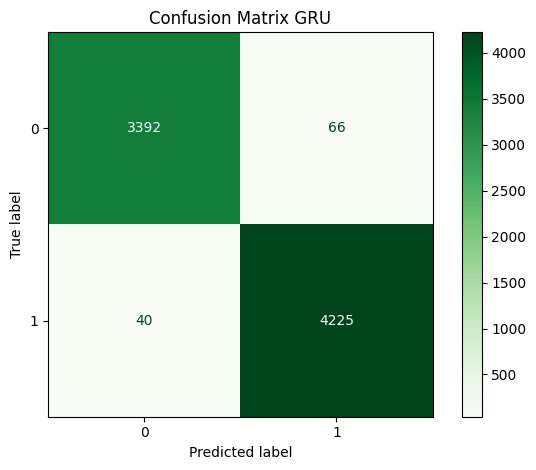

In [5]:
y_pred_probs = gru.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

classification_summary(y_test, y_pred, title="Confusion Matrix GRU", cmap="Greens")


In [6]:
gru.save(f"{models_isot_path}/gru.h5")


/Users/katerynamelnykova/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## LSTM

In [7]:
lstm = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    LSTM(64, return_sequences=False),
    Dense(1, activation='sigmoid')
])


In [8]:
lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
lstm.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 128)          2560000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2609473 (9.95 MB)
Trainable params: 2609473 (9.95 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
lstm.fit(X_train, y_train, epochs=3, batch_size=64, validation_split=0.1)

loss, accuracy = lstm.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.5f}")


Epoch 1/3
435/435 [==============================] - 56s 127ms/step - loss: 0.1385 - accuracy: 0.9501 - val_loss: 0.0720 - val_accuracy: 0.9783
Epoch 2/3
435/435 [==============================] - 55s 126ms/step - loss: 0.0321 - accuracy: 0.9905 - val_loss: 0.0874 - val_accuracy: 0.9741
Epoch 3/3
242/242 [==============================] - 5s 19ms/step - loss: 0.0661 - accuracy: 0.9825
Test Accuracy: 0.98252


242/242 [==============================] - 5s 19ms/step
Classification Report:
              precision    recall  f1-score   support

           0    0.98940   0.97137   0.98030      3458
           1    0.97713   0.99156   0.98429      4265

    accuracy                        0.98252      7723
   macro avg    0.98326   0.98146   0.98230      7723
weighted avg    0.98262   0.98252   0.98250      7723



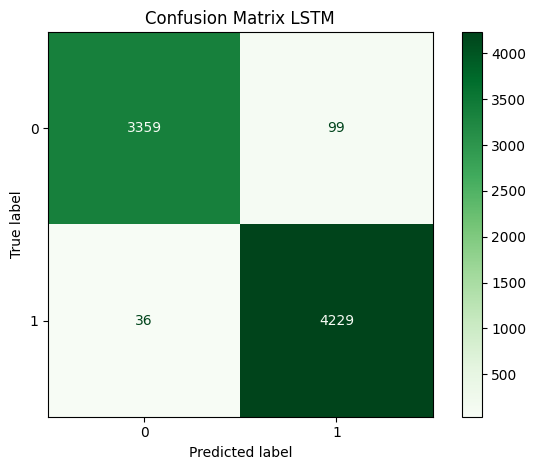

In [10]:
y_pred_probs = lstm.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

classification_summary(y_test, y_pred, title="Confusion Matrix LSTM", cmap="Greens")


In [11]:
lstm.save(f"{models_isot_path}/lstm.h5")


/Users/katerynamelnykova/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Bi-LSTM

In [12]:
bi_lstm = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    Bidirectional(LSTM(64, return_sequences=False)),
    Dense(1, activation='sigmoid')
])


In [13]:
bi_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
bi_lstm.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 200, 128)          2560000   
                                                                 
 bidirectional (Bidirection  (None, 128)               98816     
 al)                                                             
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 2658945 (10.14 MB)
Trainable params: 2658945 (10.14 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
bi_lstm.fit(X_train, y_train, epochs=3, batch_size=64, validation_split=0.1)

loss, accuracy = bi_lstm.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.5f}")


Epoch 1/3
435/435 [==============================] - 74s 168ms/step - loss: 0.1400 - accuracy: 0.9528 - val_loss: 0.0679 - val_accuracy: 0.9819
Epoch 2/3
435/435 [==============================] - 74s 170ms/step - loss: 0.0328 - accuracy: 0.9909 - val_loss: 0.0681 - val_accuracy: 0.9841
Epoch 3/3
242/242 [==============================] - 6s 24ms/step - loss: 0.0698 - accuracy: 0.9832
Test Accuracy: 0.98317


242/242 [==============================] - 5s 21ms/step
Classification Report:
              precision    recall  f1-score   support

           0    0.99202   0.97021   0.98099      3458
           1    0.97627   0.99367   0.98489      4265

    accuracy                        0.98317      7723
   macro avg    0.98414   0.98194   0.98294      7723
weighted avg    0.98332   0.98317   0.98315      7723



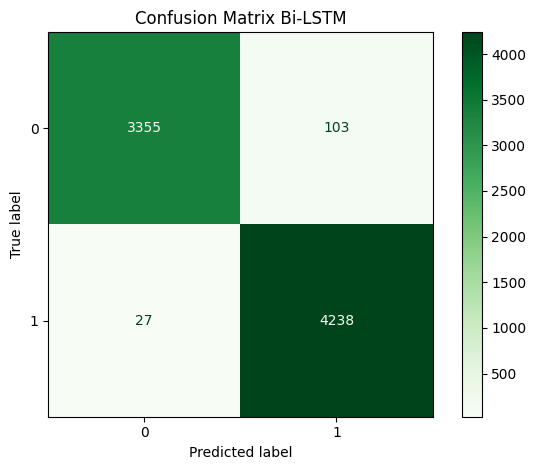

In [15]:
y_pred_probs = bi_lstm.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

classification_summary(y_test, y_pred, title="Confusion Matrix Bi-LSTM", cmap="Greens")


In [16]:
bi_lstm.save(f"{models_isot_path}/bi_lstm.h5")


/Users/katerynamelnykova/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
